# Data Ingestion

In [148]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import matplotlib.font_manager as fm
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_mutual_info_score, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [149]:
path = r"C:\Users\user322\Desktop\Machine_Learning\unsupervised_project\archive (1).zip"

In [150]:
with ZipFile(path, "r") as f:
    f.printdir()

File Name                                             Modified             Size
wine-clustering.csv                            2020-04-29 00:50:34        11089


In [151]:
with ZipFile(path, "r") as f:
    with f.open("wine-clustering.csv") as file: 
        df= pd.read_csv(file)

In [152]:
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Premilary Data Analysis

In [153]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [154]:
df.shape

(178, 13)

## Checkingout for missing values

In [155]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [156]:
df.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

## Exploratory Data Analysis

 Descriptive Data Analysis

In [157]:
df.info

<bound method DataFrame.info of      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  

In [158]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.000000,13.000618,0.811827,11.030000,12.362500,13.050000,13.677500,14.830000
Malic_Acid,178.000000,2.336348,1.117146,0.740000,1.602500,1.865000,3.082500,5.800000
Ash,178.000000,2.366517,0.274344,1.360000,2.210000,2.360000,2.557500,3.230000
Ash_Alcanity,178.000000,19.494944,3.339564,10.600000,17.200000,19.500000,21.500000,30.000000
Magnesium,178.000000,99.741573,14.282484,70.000000,88.000000,98.000000,107.000000,162.000000
Total_Phenols,178.000000,2.295112,0.625851,0.980000,1.742500,2.355000,2.800000,3.880000
Flavanoids,178.000000,2.029270,0.998859,0.340000,1.205000,2.135000,2.875000,5.080000
Nonflavanoid_Phenols,178.000000,0.361854,0.124453,0.130000,0.270000,0.340000,0.437500,0.660000
Proanthocyanins,178.000000,1.590899,0.572359,0.410000,1.250000,1.555000,1.950000,3.580000
Color_Intensity,178.000000,5.058090,2.318286,1.280000,3.220000,4.690000,6.200000,13.000000


In [159]:
num_col=df.select_dtypes(include='number').columns
num_col

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [160]:
for col in num_col:
    df[col].value_counts()
    print(df[col].value_counts())
    print("="*30)
    print()

Alcohol
13.05    6
12.37    6
12.08    5
12.29    4
12.00    3
        ..
12.82    1
12.20    1
14.16    1
13.27    1
14.13    1
Name: count, Length: 126, dtype: int64

Malic_Acid
1.73    7
1.81    4
1.67    4
1.35    3
1.90    3
       ..
2.51    1
5.65    1
3.91    1
4.28    1
4.10    1
Name: count, Length: 133, dtype: int64

Ash
2.30    7
2.28    7
2.32    6
2.36    6
2.70    6
       ..
2.15    1
2.75    1
2.69    1
2.86    1
2.37    1
Name: count, Length: 79, dtype: int64

Ash_Alcanity
20.0    15
16.0    11
21.0    11
18.0    10
19.0     9
        ..
20.8     1
26.5     1
23.5     1
25.5     1
27.0     1
Name: count, Length: 63, dtype: int64

Magnesium
88     13
86     11
101     9
98      9
96      8
102     7
85      6
94      6
112     6
89      5
97      5
80      5
103     5
92      5
90      4
108     4
106     4
107     4
120     3
116     3
118     3
95      3
100     3
87      3
110     3
84      3
111     3
78      3
104     3
93      2
115     2
113     2
91      2
105 

In [161]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

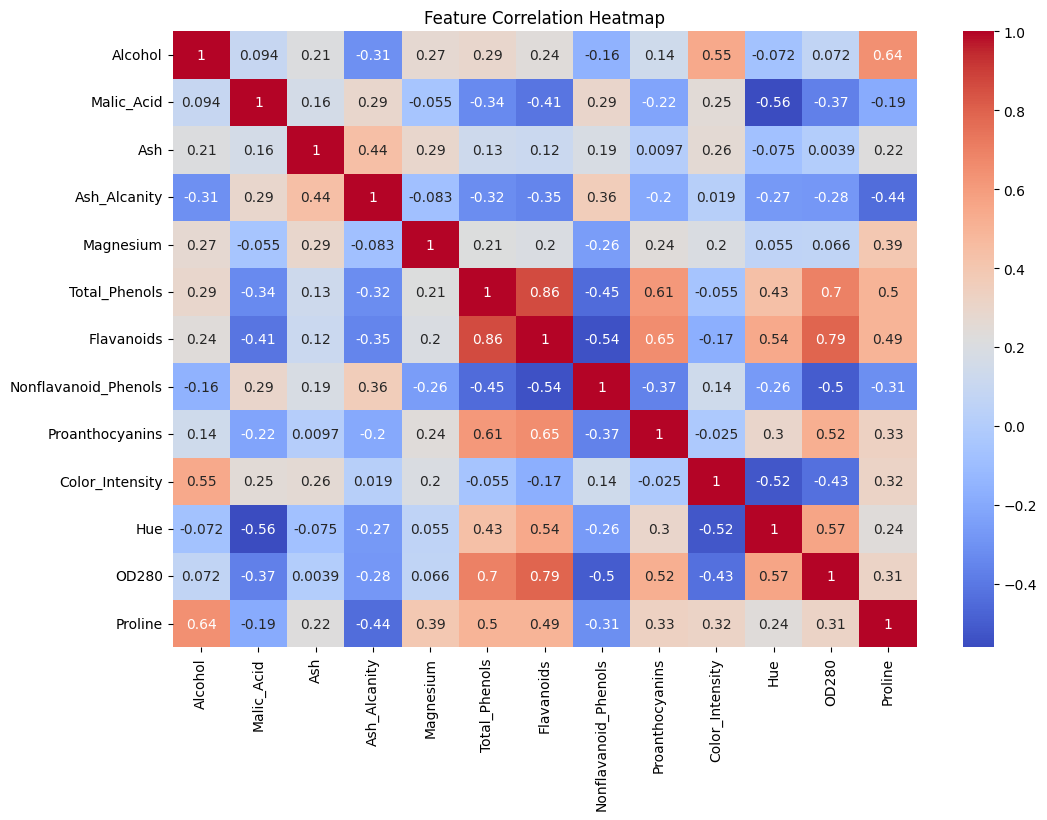

In [162]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

##  Data Preprocessing

In [163]:
# scaled data
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
scaled_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [164]:

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]], shape=(178, 13))

Explained variance ratio by PC1 and PC2: [0.36198848 0.1920749 ]
Total variance explained: 0.5540633835693527


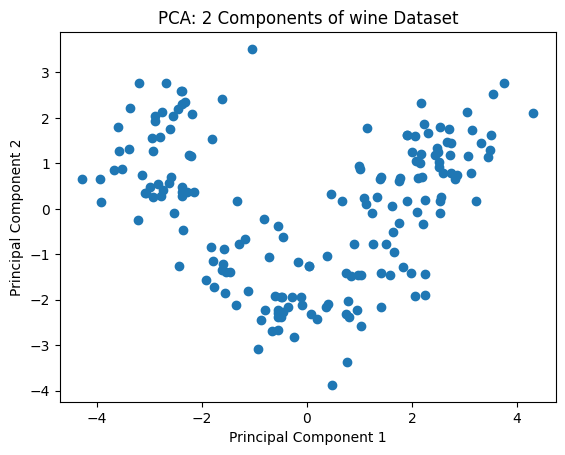

In [165]:
# Dimensionality Reduction with PCA
# Reduce 13 features . 2 principal component for visualization and noise reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio by PC1 and PC2:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))

import matplotlib.pyplot as plt

plt.scatter(x_pca[:, 0], x_pca[: , 1])
plt.title("PCA: 2 Components of wine Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [166]:

x_pca

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

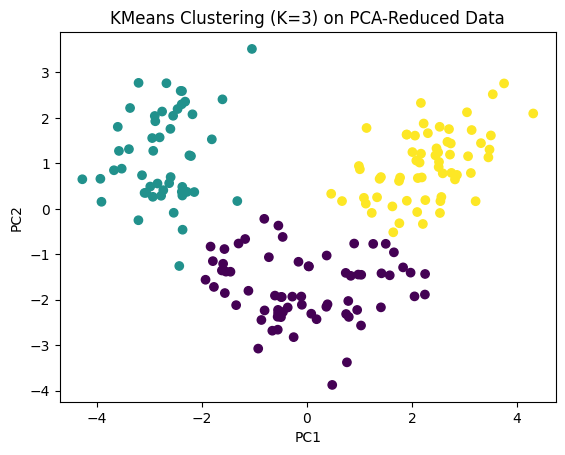

In [167]:
# Clustering with KMeans

# cluster data based on PCA components
import os
os.environ["OMP_NUM_THREADS"] = "2"

import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak. *")

from sklearn.cluster import KMeans


K = 3 # Known from wine dataset classes
Kmeans = KMeans (n_clusters=K, random_state=42)
clusters = Kmeans.fit_predict(x_pca)


pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# Visualize clusters
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis')
plt.title(f"KMeans Clustering (K={K}) on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



In [168]:
print(pca_df.columns)
print(pca_df.head())

Index(['PC1', 'PC2', 'cluster'], dtype='object')
        PC1       PC2  cluster
0  3.316751  1.443463        2
1  2.209465 -0.333393        2
2  2.516740  1.031151        2
3  3.757066  2.756372        2
4  1.008908  0.869831        2


In [169]:
# Clustering Evaluation
# Use internal metrics (no labels needed)


silhouette = silhouette_score(x_pca, clusters)
calinski= calinski_harabasz_score(x_pca, clusters)
davies = davies_bouldin_score(x_pca, clusters)


print(f"silhouette_score: (silhouette:.3f)")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"davies_Bouldin_Index: {davies:.3f}")

silhouette_score: (silhouette:.3f)
Calinski-Harabasz Index: 343.949
davies_Bouldin_Index: 0.598


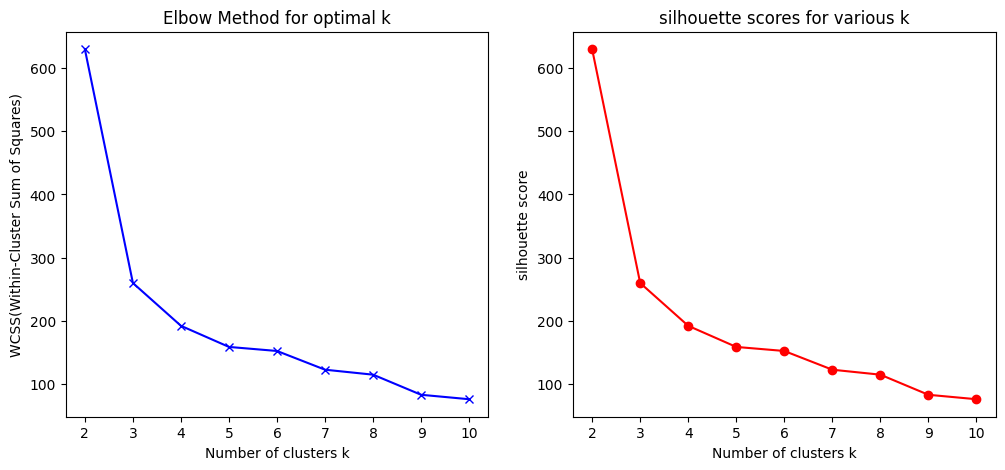

In [170]:
# Hyperparameter Tuning (choosing K)
# use the Elbow Method and silhoutte scores to choose best k
# wcss= within-cluster sum of squares 

wcss = []
sil_scores = []
k_range = range(2, 11)


for k in k_range:
    Kmeans = KMeans(n_clusters=k, random_state=42)
    Kmeans.fit(x_pca)
    wcss.append(Kmeans.inertia_)
    sil_scores.append(silhouette_score(x_pca, Kmeans.labels_))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_range, wcss, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS(Within-Cluster Sum of Squares)')
plt.title('Elbow Method for optimal k')




plt.subplot(1,2,2)
plt.plot(k_range, wcss, 'ro-')
plt.xlabel('Number of clusters k')
plt.ylabel('silhouette score')
plt.title('silhouette scores for various k')


plt.show()




In [171]:
import dash 
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Create Dash app (THIS IS CORRECT)
app = dash.Dash(__name__)

# 1 — PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])

# 2 — KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])
pca_df['cluster'] = pca_df['cluster'].astype(str)

# 3 — Plotly
fig = px.scatter(
    pca_df, 
    x='PC1', 
    y='PC2',
    color='cluster',
    template='plotly_dark'
)

# Layout
app.layout = html.Div([
    html.H1("Unsupervised Learning Project: PCA + KMeans Clustering"),
    dcc.Graph(figure=fig),
    html.Div([
        html.P(f"silhouette_score: {silhouette:.3f}"),
        html.P(f"calinski_Harabasz_Index: {calinski:.3f}"),
        html.P(f"Davies-Bouldin Index: {davies:.3f}")
    ], style={'fontSize': '18px', 'padding': '20px'})
])

# Run Dash server
if __name__ == '__main__':
    app.run(debug=True)

In [172]:
# Summaru
# loaded and exploreed the wine dataset
# Scaled features and reduced dimensions with PCA
# clustered using KMeans and evaluated clustering performance.
# Used Elbow and Silhouette methods to confirm the number of clusters
# Built an interactive dashboard for exploratory visualization